## PCA Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

c:\Users\ASUS\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DimensionalityReduction:
    def __init__(self, data_file):
        self.data = np.loadtxt(data_file)
        self.standardized_data = None
        self.projected_data = None
        self.umap_data = None
        self.tsne_data = None

    def standardize_data(self):
        mean = np.mean(self.data, axis=0)
        std = np.std(self.data, axis=0)
        self.standardized_data = (self.data - mean) / std
        
    def perform_pca(self):
        if self.standardized_data is None:
            self.standardize_data()
        cov_matrix = np.cov(self.standardized_data, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        top_indices = np.argsort(eigenvalues)[::-1][:2]
        top_eigenvectors = eigenvectors[:, top_indices]
        self.projected_data = np.dot(self.standardized_data, top_eigenvectors)

    def perform_umap(self, n_neighbors=15, min_dist=0.1):
        self.umap_data = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2).fit_transform(self.data)

    def perform_tsne(self, perplexity=30):
        self.tsne_data = TSNE(n_components=2, perplexity=perplexity).fit_transform(self.data)

    def plot(self, data, title):
        plt.scatter(data[:, 0], data[:, 1], alpha=0.7, s=5)
        plt.title(title)
        plt.show()

    def plot_pca(self):
        if self.projected_data is None:
            self.perform_pca()
        self.plot(self.projected_data, "PCA 2D Scatter Plot")

    def plot_umap(self):
        if self.umap_data is None:
            self.perform_umap()
        self.plot(self.umap_data, "UMAP Scatter Plot")

    def plot_tsne(self):
        if self.tsne_data is None:
            self.perform_tsne()
        self.plot(self.tsne_data, "t-SNE Scatter Plot")

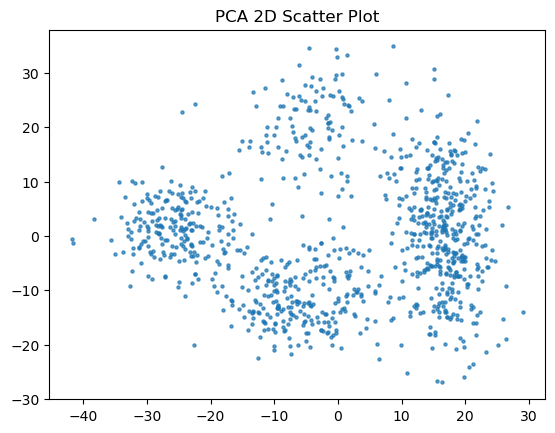

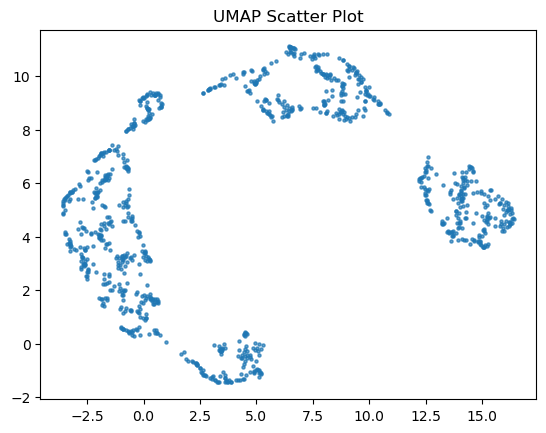

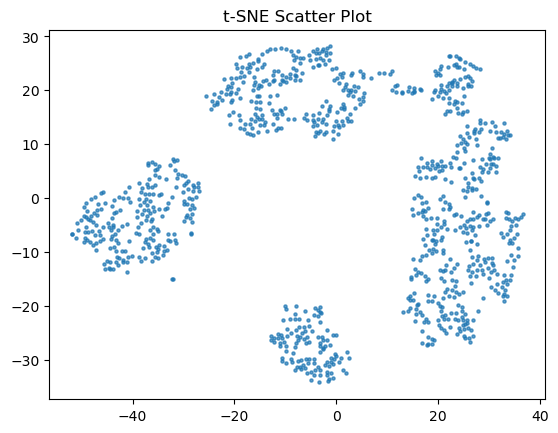

In [3]:
dr = DimensionalityReduction('pca_data.txt')

# PCA
dr.plot_pca()

# UMAP
dr.perform_umap(n_neighbors=15, min_dist=0.1)
dr.plot_umap()

# t-SNE
dr.perform_tsne(perplexity=30)
dr.plot_tsne()

## EM Algorithm Implementation

In [4]:
import numpy as np
from scipy.special import factorial

In [5]:
class EMAlgorithm:
    def __init__(self, data_file, mean1_init=2, mean2_init=5, pi_init=0.5, iterations=100):
        """
        Initializes the EM algorithm for a dataset.
        
        Parameters:
        - data_file (str): Path to the file containing the data.
        - mean1_init (float): Initial mean for group 1.
        - mean2_init (float): Initial mean for group 2.
        - pi_init (float): Initial proportion for group 1.
        - iterations (int): Number of iterations to run the EM algorithm.
        """
        self.data = np.loadtxt(data_file)
        self.mean1 = mean1_init
        self.mean2 = mean2_init
        self.pi = pi_init
        self.iterations = iterations
        self.responsibilities = None

    def e_step(self):
        r1 = self.pi * (np.exp(-self.mean1) * self.mean1**self.data) / factorial(self.data)
        r2 = (1 - self.pi) * (np.exp(-self.mean2) * self.mean2**self.data) / factorial(self.data)
        self.responsibilities = r1 / (r1 + r2)

    def m_step(self):
        self.mean1 = np.sum(self.responsibilities * self.data) / np.sum(self.responsibilities)
        self.mean2 = np.sum((1 - self.responsibilities) * self.data) / np.sum(1 - self.responsibilities)
        self.pi = np.mean(self.responsibilities)

    def run(self):
        for _ in range(self.iterations):
            self.e_step()
            self.m_step()

    def get_results(self):
        """
        Returns the results of the EM algorithm.
        
        Returns:
        - mean1 (float): Estimated mean for group 1.
        - mean2 (float): Estimated mean for group 2.
        - pi (float): Estimated proportion of group 1.
        """
        return self.mean1, self.mean2, self.pi, 1 - self.pi

    def print_results(self):
        mean1, mean2, pi_family, pi_no_family = self.get_results()
        print("Mean number of children (Family Planning):", mean1)
        print("Mean number of children (No Family Planning):", mean2)
        print("Proportion of families with Family Planning:", pi_family)
        print("Proportion of families without Family Planning:", pi_no_family)

In [6]:
em = EMAlgorithm('em_data.txt', mean1_init=2, mean2_init=5, pi_init=0.5, iterations=100)
em.run()
em.print_results()

Mean number of children (Family Planning): 1.7838958278209045
Mean number of children (No Family Planning): 4.911980725521366
Proportion of families with Family Planning: 0.35644196432808395
Proportion of families without Family Planning: 0.643558035671916
